# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('fraudTest.csv')

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [5]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [6]:
type(df_select["trans_date_trans_time"][0])

str

In [7]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

/var/folders/qc/2tlxx3rx1pj4d2p7v3h6549h0000gn/T/ipykernel_43768/2067604160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [8]:
type(df_select["trans_date_trans_time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
dir(df_select["trans_date_trans_time"][0]) #show attributes 

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_repr_base',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_

In [10]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

/var/folders/qc/2tlxx3rx1pj4d2p7v3h6549h0000gn/T/ipykernel_43768/3754470976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [11]:
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15
4,2020-06-21 12:15:17,travel,3.19,1126,0,17
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0,7
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0,9
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0,15
555717,2020-12-31 23:59:24,travel,7.99,129,0,24


In [12]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [13]:
X

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,111.84,28739,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,86.88,3684,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,7.99,129,24,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 4.) Oversample the data

In [14]:
resample_X = X
resample_y = y

# 5.) Train a Logistic regression.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(resample_X)
X_normalized

array([[-0.42446311,  0.81652054, -0.2596696 , ..., -0.2851168 ,
        -0.31371195, -0.18004671],
       [-0.25233729, -0.2926852 ,  0.20264419, ..., -0.2851168 ,
        -0.31371195, -0.18004671],
       [-0.17935288, -0.17885341,  1.35842867, ..., -0.2851168 ,
        -0.31371195, -0.18004671],
       ...,
       [ 0.11156401, -0.28142652, -0.83756184, ..., -0.2851168 ,
        -0.31371195, -0.18004671],
       [-0.39173496, -0.29326111, -0.31745883, ..., -0.2851168 ,
        -0.31371195,  5.55411434],
       [-0.19944911,  0.09247663,  0.26043341, ..., -0.2851168 ,
        -0.31371195, -0.18004671]])

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
train_size = int(len(X_normalized) * 0.8)
xtrain = X_normalized[0:train_size]
xtest = X_normalized[train_size:]
ytrain,ytest = resample_y[0:train_size], resample_y[train_size:]

In [18]:
log_reg = LogisticRegression().fit(xtrain,ytrain)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

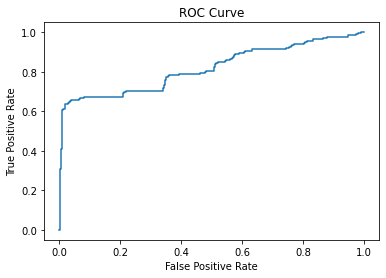

Threshold value closest to a FPR of 5%: 0.0114


In [31]:
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Assume that you have already trained your logistic regression model and obtained predicted probabilities for each sample
y_pred_proba = log_reg.predict_proba(xtest)[:,1]

# Calculate the true positive rate (TPR) and false positive rate (FPR) at different threshold values
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Find the threshold value on the ROC curve that corresponds to a FPR closest to 5%
threshold = thresholds[np.argmin(np.abs(fpr - 0.05))]
print(f"Threshold value closest to a FPR of 5%: {threshold:.4f}")

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [20]:
df_temp = df_select.copy()
df_temp

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15
4,2020-06-21 12:15:17,travel,3.19,1126,0,17
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0,7
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0,9
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0,15
555717,2020-12-31 23:59:24,travel,7.99,129,0,24


In [21]:
df_temp["pred"] = log_reg.predict(resample_X)
df_temp

/Users/wen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var,pred
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15,0
4,2020-06-21 12:15:17,travel,3.19,1126,0,17,0
...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0,7,0
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0,9,0
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0,15,0
555717,2020-12-31 23:59:24,travel,7.99,129,0,24,0


In [22]:
df_temp = df_temp[["pred", "is_fraud", "amt"]]

In [40]:
df_temp
# Which combinations of "pred" and "if_fraud" do we profit .02*amt, which cases do 
# we lose -amt??

,pred,is_fraud,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19
...,...,...,...
555714,0,0,43.77
555715,0,0,111.84
555716,0,0,86.88
555717,0,0,7.99


In [46]:
total = 0
for i in range (len(df_temp[['pred']])):
    if(df_temp['pred'][i]==1) & (df_temp['is_fraud'][i]==1):
        total = total + 0.02 * df_temp['amt'][i]
    elif (df_temp['pred'][i]==0) & (df_temp['is_fraud'][i]==1):
        total = total - df_temp['amt'][i]
    else:
        total = total
        

In [47]:
total

-748392.0411999989

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [37]:
lasso_reg = LogisticRegression(penalty='l1',solver='liblinear') 
lasso_reg.fit(xtrain, ytrain)

y_pred = lasso_reg.predict(xtest)

In [38]:
coef = lasso_reg.coef_
coef

array([[ 0.37346159, -0.18904724, -0.00711941, -0.05528945, -0.0788675 ,
         0.09812044,  0.03616105,  0.42431301, -0.07061818, -0.14797435,
        -0.09808496,  0.31730851,  0.        ,  0.        ,  0.38817799,
         0.05546593, -0.85241303]])

In [26]:
# If most or all your variables go to 0 => Your data is garbage
# The regularization will tell us if our model has significance
# This of using coefficient strength similar to r^2

Yes, the selected features from Lasso regression can be used in a trusted prediction model. Lasso regression is a technique for feature selection in which it shrinks the less important feature's coefficient to zero. So, the features that have non-zero coefficients are the ones that are selected and can be used in the prediction model. However, it is still important to evaluate the performance of the model with the selected features to ensure that it is satisfactory.